In [15]:
import warnings
warnings.filterwarnings(action='ignore')

from glob import glob

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
def load_data(file, sheet_name):
    return pd.read_excel(file, sheet_name=sheet_name)

In [17]:
def load_all_data():
    files = glob('/Users/sabin/Documents/Project/뉴스와 소셜데이터 기반 이슈 분석 및 시각화/Trend-analysis/dataset/임대차3법(54,752건)/*.xlsx')
    df = pd.DataFrame()
    for file in files:
        df = df.append(load_data(file, '커뮤니티'))
    return df

community = load_all_data()

## 커뮤니티 Sheet

In [18]:
community.isna().sum()

Unnamed: 0     0
Unnamed: 1     0
Unnamed: 2     0
Unnamed: 3    66
dtype: int64

In [19]:
community.columns = community.iloc[0]
community.drop(0, inplace=True, axis=0)
community = community.dropna(axis=0, how='any')
community = community[~community['내용'].str.contains('http')]
community = community[community['내용'].str.contains('[가-힣]')]
community = community[community['내용'].str.len() < 1000]


print(community.shape)
community.head()

(10677, 4)


,작성일,작성자,제목,내용
25,2020/07/31,붇옹산의 부동산스터디,임대차3법 통과로 전세가 소멸된다는 것에 대해 조금 궁금합니다.,"임대차3법 통과로, 임대인분들도 임차인분들도 많은 혼란과 혼선, 그리고 심려가 있는..."
27,2020/07/28,붇옹산의 부동산스터디,"임대차3법, 뻥 아니고 진짜로 시행하나 봅니다. 어떤 부작용이 있는지 한번 알아봅시다",??<전셋값 급등 주의>_x000D_\n​ _x000D_\n임대차3법 따른 전셋값 ...
45,2020/08/01,클리앙,[임대차3법 관련 임차인] 법 적용 가능 여부 문의드립니다.,전세계약 만기가 9월 중순입니다. 2년 전 입주 시기 대비 전세계약 물건 소재 아파...
54,2020/07/27,동탄2신도시분양,임대차3법 질문드립니다. (집주인 확정된권리??),"안녕하세요. _x000D_\n임대차3법에 관해서 몇가지 질문이 있어, 게시글을 남기..."
59,2020/12/12,붇옹산의 부동산스터디,임대차3법이 야기한 '천태만상'과 삼호어묵·이상우의 비판을 들어보자,_x000D_\n _x000D_\n _x000D_\n _x000D_\n _x...


## TF-IDF

In [20]:
def tfdif(corpus):
    cv = CountVectorizer(ngram_range=(1, 2), max_features=1000)
    document_term_matrix = cv.fit_transform(corpus)

    tf = pd.DataFrame(document_term_matrix.toarray(), columns=cv.get_feature_names())  # TF (Term Frequency)

    D = len(tf)
    df = tf.astype(bool).sum(axis=0)
    idf = np.log((D+1) / (df+1)) + 1             # IDF (Inverse Document Frequency)

    # TF-IDF (Term Frequency-Inverse Document Frequency)
    tfidf = tf * idf                      
    tfidf = tfidf / np.linalg.norm(tfidf, axis=1, keepdims=True)
    
    return tfidf


In [21]:
tfidf_community = tfdif(community['내용'])

In [22]:
tfidf_community = tfidf_community.loc[:, tfidf_community.columns.str.contains('[가-힣]')]

In [23]:
tfidf_community

,10월,11월,12월,180석,1가구,1년,1년만,1억,1월,1위,...,환원하여,환원하여 상가의,활동의,활동의 기본입니다,회원비방,회원비방 욕설,회원의,회원의 선택,후에,훨씬
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.067572,0.067572,0.067572,0.067572,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
10673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
10674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
10675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [24]:
# import pickle

# tfidf_community.to_pickle('./tfidf_df/tfidf_community.pkl')

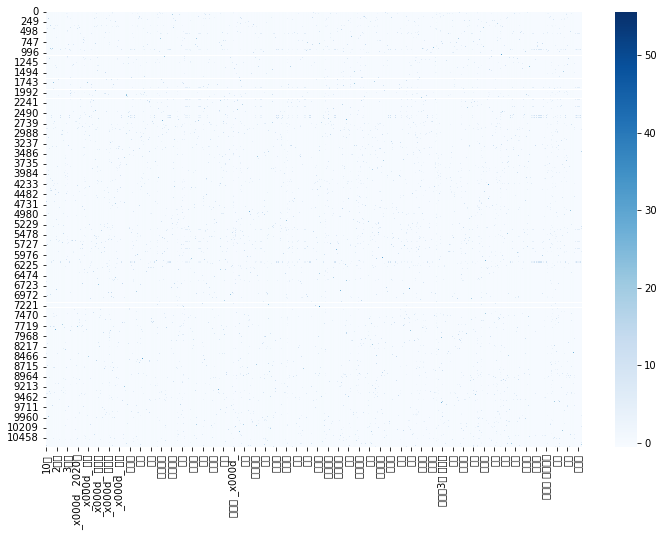

In [25]:
tfidf_community = (tfidf_community - tfidf_community.mean()) / tfidf_community.std()

# visualize

plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_community, cmap='Blues')
plt.show()


# TFDIF

We couldn't figure the relationship between the words linearly here as well

as we can see in the graph above